# Market Prices time-series dataset released by OCHA

Link to Market Prices data released by OCHA: https://data.humdata.org/

In [1]:
import pandas as pd
import numpy as np
import ntpath
import glob
# Set a value to column width in order to not view dataframe too bulky.
pd.options.display.max_colwidth = 30

In [2]:
# Add the python path to the folder containing some useful custom packages.
import sys
sys.path.insert(0, "../../packages/")
from map_plot import draw_adminstratas
from TsIP.TsIP import TsIP

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

# YEM, NGA, BFA, SYR

The data of three countries are provided: *Yemen* (YEM), *Nigeria* (NGA), *Burkina Faso* (BFA) and *Syria* (SYR).

In [4]:
# Read the data released by WFP regarding the market price indicator.
path = "./wfp_data/"
all_files = glob.glob(path + "*.csv")

dfs = []

# Concatenate the data of the countries in an unique dataframe.
for filename in all_files:
    df = pd.read_csv(filename, header = 1)
    df["Country"] = ntpath.basename(filename).split(".")[0]
    dfs.append(df)

df = pd.concat(dfs, axis = 0, ignore_index = True)
print("The data released by wfp:")
df.head()

The data released by wfp:


,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,Unnamed: 10,#item+code,Unnamed: 12,Unnamed: 13,#item+type+code,#meta+id,Unnamed: 16,Country
0,2020-04-15,Rice (imported) - Retail,KG,cereals and tubers,400.0000,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,64,15,5,1,141_64_15_5,NaN,Burkina Faso
1,2020-05-15,Rice (imported) - Retail,KG,cereals and tubers,400.0000,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,64,15,5,1,141_64_15_5,NaN,Burkina Faso
2,2003-01-15,Maize (white) - Retail,KG,cereals and tubers,156.2500,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,67,15,5,1,141_67_15_5,NaN,Burkina Faso
3,2003-02-15,Maize (white) - Retail,KG,cereals and tubers,156.2500,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,67,15,5,1,141_67_15_5,NaN,Burkina Faso
4,2003-03-15,Maize (white) - Retail,KG,cereals and tubers,153.5156,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,67,15,5,1,141_67_15_5,NaN,Burkina Faso


In [5]:
# Rename some columns names.
df.rename(columns = {"#date": "Datetime", "#item+name": "Commodity", "#item+unit": "Unit", "#item+type": "Food Group", 
                     "#value": "Price", "#currency": "Currency", "#adm1+name": "AdminStrata"}, inplace = True)
# Select only some feature items.
df = df[["Datetime", "Commodity", "Unit", "Food Group", "Price", "Currency", "AdminStrata", "Country"]]
df.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
0,2020-04-15,Rice (imported) - Retail,KG,cereals and tubers,400.0000,XOF,Boucle Du Mouhoun,Burkina Faso
1,2020-05-15,Rice (imported) - Retail,KG,cereals and tubers,400.0000,XOF,Boucle Du Mouhoun,Burkina Faso
2,2003-01-15,Maize (white) - Retail,KG,cereals and tubers,156.2500,XOF,Boucle Du Mouhoun,Burkina Faso
3,2003-02-15,Maize (white) - Retail,KG,cereals and tubers,156.2500,XOF,Boucle Du Mouhoun,Burkina Faso
4,2003-03-15,Maize (white) - Retail,KG,cereals and tubers,153.5156,XOF,Boucle Du Mouhoun,Burkina Faso


The data have a month granularity. We convert the temporal information to an appropriate pandas datetime object selecting the data beyond a defined year.

In [6]:
# Select only the data beyond this year.
year = 2018

In [7]:
# Convert the item 'Datetime' in the format 'end of the month'.
def datetime(date):
    date = pd.to_datetime(date)
    date = date + pd.offsets.MonthEnd(0) 
    return date

df["Datetime"] = df["Datetime"].apply(datetime)
df.sort_values("Datetime", ascending = True, inplace = True) # Sort on datetime.
df.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
15881,1992-01-31,Millet - Retail,KG,cereals and tubers,70.25,XOF,Est,Burkina Faso
4842,1992-01-31,Millet - Retail,KG,cereals and tubers,82.00,XOF,Cascades,Burkina Faso
10432,1992-01-31,Millet - Retail,KG,cereals and tubers,55.50,XOF,Centre-nord,Burkina Faso
12169,1992-01-31,Millet - Retail,KG,cereals and tubers,69.00,XOF,Centre-ouest,Burkina Faso
25140,1992-01-31,Millet - Retail,KG,cereals and tubers,73.00,XOF,Sahel,Burkina Faso


In [8]:
print("Select only the data beyond the year %d." % year)
df = df.loc[pd.DatetimeIndex(df.Datetime).year >= year]
df.reset_index(drop = True, inplace = True)
df.head()

Select only the data beyond the year 2018.


,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
0,2018-01-31,"Livestock (sheep, two-year...",Head,"meat, fish and eggs",83875.0,SYP,City_Damascus,Syria
1,2018-01-31,Fuel (diesel) - Retail,L,non-food,400.0,YER,Marib,Yemen
2,2018-01-31,Eggs - Retail,30 pcs,"meat, fish and eggs",1000.0,SYP,Homs,Syria
3,2018-01-31,Bread (shop) - Retail,1.3 KG,cereals and tubers,65.0,SYP,Tartous,Syria
4,2018-01-31,Eggs - Retail,30 pcs,"meat, fish and eggs",950.0,SYP,Hama,Syria


### Brief items description

In [9]:
print("Check if the dataframe contains NaN values:")
df.isnull().sum()

Check if the dataframe contains NaN values:


Datetime       0
Commodity      0
Unit           0
Food Group     0
Price          0
Currency       0
AdminStrata    0
Country        0
dtype: int64

### Country item

In [10]:
print("The countries in the dataset are:", ", ".join(df.Country.unique()))

The countries in the dataset are: Syria, Yemen, Nigeria, Burkina Faso


### AdminStrata item

In [11]:
# Rename the name of some AdminStrata of Burkina Faso according to the fcs and rcsi names of the AdminStrata.
df.replace(["Boucle Du Mouhoun", "Sud-ouest", "Plateau Central", "Centre-est", "Centre-ouest", "Centre-nord", "Centre-sud", "Hauts-bassins"], 
           ["Boucle-Du-Mouhoun", "Sud-Ouest", "Plateau-Central", "Centre-Est", "Centre-Ouest", "Centre-Nord", "Centre-Sud", "Hauts-Bassins"], inplace = True)

In [12]:
# Rename the name of some AdminStrata of Syria according to the fcs and rcsi names of the AdminStrata.
df.replace(["As_Suweida", "Dara", "Damascus", "City_Damascus", "Hassakeh", "Raqqa", "Dayr_Az_Zor", "Al_Qunaytirah"], 
           ["As-Sweida", "Dar'a", "Rural Damascus", "Damascus", "Al-Hasakeh", "Ar-Raqqa", "Deir-ez-Zor", "Quneitra"], inplace = True)

In [13]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen**: the administrative division of Yemen is divided into two main divisions (governorates and districts). There are 22 governorates, including the capital Sana'a (Amanat Al Asimah) and Socotra Archipelago. The Market Prices dataframe has the values of 21 governorates (Socotra not included; more precisely, Socotra is considered into the Hadramaut province. In fact, a market of Hadramaut province is on Socotra island).

In [14]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(21,)


array(['Marib', 'Hadramaut', 'Lahj', 'Aden', 'Al Bayda', 'Hajjah',
       "Al Dhale'e", "Sana'a", "Sa'ada", 'Shabwah', 'Ibb', 'Al Maharah',
       'Amran', 'Abyan', 'Al Mahwit', 'Dhamar', 'Al Hudaydah', 'Al Jawf',
       'Amanat Al Asimah', 'Raymah', 'Taizz'], dtype=object)

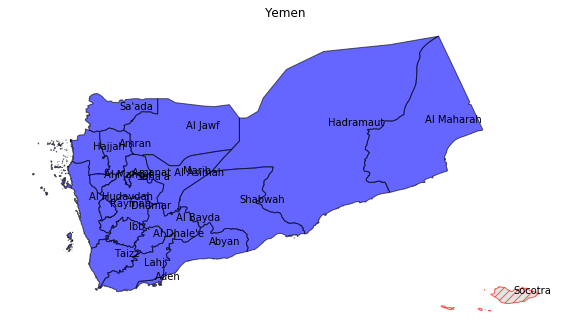

In [15]:
draw_adminstratas("Yemen", AdminStratas["Yemen"], "../Shape Files/shapefiles/Yemen/administrative level 1", figsize = (10, 7), annotation = True)

- **Nigeria**: Nigeria is divided into 36 states. It also includes *The Federal Capital Territory* that is not a state and it is under the direct control of the federal government. The AdminStrata items of the Market Price dataframe cover 14 states.

In [16]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(13,)


array(['Yobe', 'Borno', 'Katsina', 'Zamfara', 'Oyo', 'Kebbi', 'Kano',
       'Lagos', 'Kaduna', 'Jigawa', 'Gombe', 'Adamawa', 'Sokoto'],
      dtype=object)

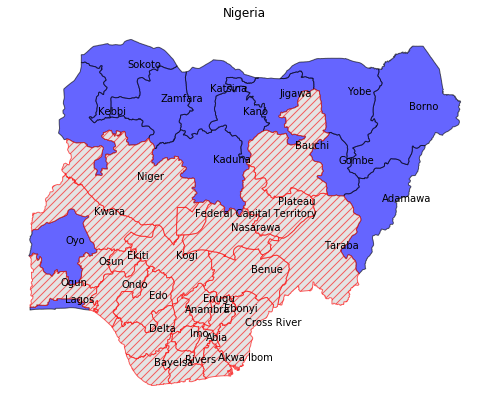

In [17]:
draw_adminstratas("Nigeria", AdminStratas["Nigeria"], "../Shape Files/shapefiles/Nigeria/administrative level 1", figsize = (10, 7), annotation = True)

- **Syria**: the governatores of the Syria country are 14. The Food Price dataframe has the values of all 14 governatores.

In [18]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(14,)


array(['Damascus', 'Homs', 'Tartous', 'Hama', 'Lattakia', 'As-Sweida',
       'Deir-ez-Zor', 'Al-Hasakeh', 'Ar-Raqqa', 'Idleb', 'Rural Damascus',
       "Dar'a", 'Aleppo', 'Quneitra'], dtype=object)

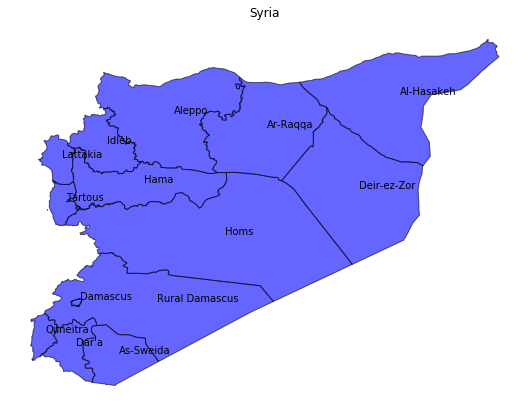

In [19]:
draw_adminstratas("Syria", AdminStratas["Syria"], "../Shape Files/shapefiles/Syria/administrative level 1", figsize = (10, 7), annotation = True)

- **Burkina Faso**: Burkina Faso is divided into 13 administrative regions. The Market Price dataframe has the values of all 13 regions.

In [20]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Centre', 'Est', 'Sud-Ouest', 'Centre-Est', 'Hauts-Bassins',
       'Boucle-Du-Mouhoun', 'Sahel', 'Cascades', 'Centre-Ouest',
       'Centre-Sud', 'Centre-Nord', 'Plateau-Central', 'Nord'],
      dtype=object)

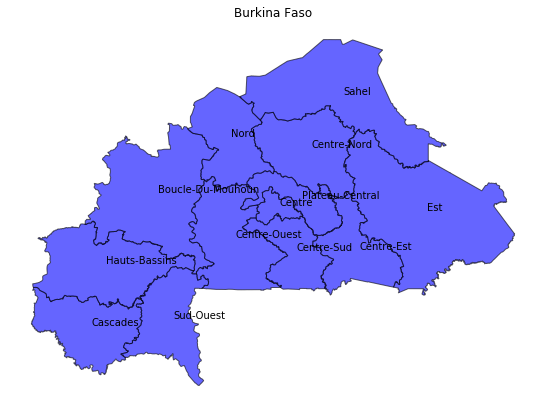

In [21]:
draw_adminstratas("Burkina Faso", AdminStratas["Burkina Faso"], "../Shape Files/shapefiles/Burkina Faso/administrative level 1", figsize = (10, 7), annotation = True)

## Other items

In [22]:
print("The various types of commodities:")
np.sort(df.Commodity.unique())

The various types of commodities:


array(['Apples - Retail', 'Bananas - Retail',
       'Beans (kidney red) - Retail', 'Beans (niebe) - Retail',
       'Beans (red) - Retail', 'Beans (white) - Retail',
       'Bread (bakery) - Retail', 'Bread (shop) - Retail',
       'Bread - Retail', 'Bulgur - Retail', 'Bulgur - Wholesale',
       'Carrots - Retail', 'Cassava meal (gari, yellow) - Retail',
       'Cassava meal (gari, yellow) - Wholesale', 'Cheese - Retail',
       'Chickpeas - Retail', 'Cowpeas (brown) - Retail',
       'Cowpeas (brown) - Wholesale', 'Cowpeas (white) - Retail',
       'Cowpeas (white) - Wholesale', 'Cowpeas - Retail',
       'Dates - Retail', 'Eggplants - Retail', 'Eggs - Retail',
       'Exchange rate (unofficial) - Retail',
       'Fish (sardine, canned) - Retail', 'Fish (tuna, canned) - Retail',
       'Fish - Retail', 'Fuel (diesel) - Retail',
       'Fuel (diesel, parallel market) - Retail', 'Fuel (gas) - Retail',
       'Fuel (gas, parallel market) - Retail',
       'Fuel (petrol-gasoline) - Reta

N.B. Not all the countries (or also provinces) have a time-series for all this commodities.

In [23]:
print("The various type of food groups:")
np.sort(df["Food Group"].unique())

The various type of food groups:


array(['cereals and tubers', 'meat, fish and eggs', 'milk and dairy',
       'miscellaneous food', 'non-food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits'], dtype=object)

For our work, we consider only the *Exchange rate (unofficial) - Retail* commodity and all the commodities that belong to *cereals and tubers* group.

In [24]:
# Select sub-dataframe.
df = df.loc[(df.Commodity == "Exchange rate (unofficial) - Retail") | (df["Food Group"] == "cereals and tubers")]
df.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
3,2018-01-31,Bread (shop) - Retail,1.3 KG,cereals and tubers,65.0,SYP,Tartous,Syria
6,2018-01-31,Wheat - Retail,KG,cereals and tubers,200.0,YER,Hadramaut,Yemen
10,2018-01-31,Wheat flour - Retail,KG,cereals and tubers,220.0,SYP,Damascus,Syria
12,2018-01-31,Wheat flour - Retail,KG,cereals and tubers,250.0,SYP,As-Sweida,Syria
14,2018-01-31,Rice - Wholesale,MT,cereals and tubers,400000.0,SYP,Homs,Syria


In [25]:
print("The unit of measure of the commodoties:")
df.Unit.unique()

The unit of measure of the commodoties:


array(['1.3 KG', 'KG', 'MT', 'USD/LCU', '1.4 KG', '100 KG', '50 KG',
       '3.1 KG', '3.4 KG', 'Unit', '100 Tubers'], dtype=object)

In [26]:
print("Check if some commodities are measured using different unit type:")
commodities_units = dict()

def unit_check(group):
    if len(group.Unit.unique()) > 1:
        commodities_units[group.Commodity.unique()[0]] = list(group.Unit.unique())

df.groupby(["Commodity"]).apply(unit_check)
print(commodities_units)

Check if some commodities are measured using different unit type:
{'Millet - Retail': ['KG', '1.4 KG'], 'Rice (imported) - Retail': ['KG', '1.4 KG'], 'Rice (imported) - Wholesale': ['100 KG', '50 KG'], 'Rice (local) - Retail': ['1.4 KG', 'KG'], 'Rice (milled, local) - Wholesale': ['50 KG', '100 KG'], 'Sorghum - Retail': ['KG', '1.3 KG', '1.4 KG'], 'Yam - Retail': ['3.1 KG', 'KG', '3.4 KG'], 'Yam - Wholesale': ['100 KG', '100 Tubers']}


Convert all the commodities with double unit to have a single unit and the commodities with single unit to have a smaller unit (as KG).

**ATTENTION**. There is an ambiguous unit type: *100 Tubers*. We simply convert it into KG without scaling the price value.

In [27]:
# Convert all the commodities with double unit to have a single unit and the commodities with single unit to have a smaller unit (as KG).
def adjust_unit(group):
    def adjusting(row):
        a = row.Unit
        b = row.Price
        c = row.Commodity
        # Select the common unit of measure.
        if row.Unit == "50 KG":
            a = "KG"
            b = row.Price/50
        elif row.Unit == "100 KG":
            a = "KG"
            b = row.Price/100
        elif row.Unit == "1.4 KG":
            a = "KG"
            b = row.Price/1.4
        elif row.Unit == "1.3 KG":
            a = "KG"
            b = row.Price/1.3
        elif row.Unit == "3.4 KG":
            a = "KG"
            b = row.Price/3.4
        elif row.Unit == "3.1 KG":
            a = "KG"
            b = row.Price/3.1
        elif row.Unit == "MT":
            a = "KG"
            b = row.Price/1000
        elif row.Unit == "100 Tubers":
            a = "KG"
            b = row.Price
            
        return pd.Series([a, b, c])    

    group[["Unit", "Price", "Commodity"]] = group.apply(adjusting, axis = 1)

    return group 

df = df.groupby(["Commodity"]).apply(adjust_unit)
df.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
3,2018-01-31,Bread (shop) - Retail,KG,cereals and tubers,50.0,SYP,Tartous,Syria
6,2018-01-31,Wheat - Retail,KG,cereals and tubers,200.0,YER,Hadramaut,Yemen
10,2018-01-31,Wheat flour - Retail,KG,cereals and tubers,220.0,SYP,Damascus,Syria
12,2018-01-31,Wheat flour - Retail,KG,cereals and tubers,250.0,SYP,As-Sweida,Syria
14,2018-01-31,Rice - Wholesale,KG,cereals and tubers,400.0,SYP,Homs,Syria


In [28]:
# Check if some commodities are still measured using different Unit type.
commodities_units = dict()

df.groupby(["Commodity"]).apply(unit_check)
print(commodities_units)

{}


In [29]:
# The unit of measure of the commodoties.
df.Unit.unique()

array(['KG', 'USD/LCU', 'Unit'], dtype=object)

In [30]:
# Add a suffix to each Commodity corresponding to the value unit.
def add_unit(row):
    a = row.Commodity
    b = row.Unit
    return pd.Series([a + " (" + b + ")", b])

df[["Commodity", "Unit"]] = df.apply(add_unit, axis = 1)
df.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
3,2018-01-31,Bread (shop) - Retail (KG),KG,cereals and tubers,50.0,SYP,Tartous,Syria
6,2018-01-31,Wheat - Retail (KG),KG,cereals and tubers,200.0,YER,Hadramaut,Yemen
10,2018-01-31,Wheat flour - Retail (KG),KG,cereals and tubers,220.0,SYP,Damascus,Syria
12,2018-01-31,Wheat flour - Retail (KG),KG,cereals and tubers,250.0,SYP,As-Sweida,Syria
14,2018-01-31,Rice - Wholesale (KG),KG,cereals and tubers,400.0,SYP,Homs,Syria


In [31]:
df.Currency.unique()

array(['SYP', 'YER', 'NGN', 'XOF'], dtype=object)

In [32]:
# Delete the unutilized columns in this notebook.
df.drop(labels = ["Unit", "Currency"], axis = 1, inplace = True)
df.head()

,Datetime,Commodity,Food Group,Price,AdminStrata,Country
3,2018-01-31,Bread (shop) - Retail (KG),cereals and tubers,50.0,Tartous,Syria
6,2018-01-31,Wheat - Retail (KG),cereals and tubers,200.0,Hadramaut,Yemen
10,2018-01-31,Wheat flour - Retail (KG),cereals and tubers,220.0,Damascus,Syria
12,2018-01-31,Wheat flour - Retail (KG),cereals and tubers,250.0,As-Sweida,Syria
14,2018-01-31,Rice - Wholesale (KG),cereals and tubers,400.0,Homs,Syria


In [33]:
# Create appropriate time-series sub-groups with an appropriate datetime object sampling to month. 
# If for the same date a province has more than one market price, the mean is taken.
df = df.groupby(["Country", "AdminStrata", "Food Group", "Commodity"]).apply(lambda group: group.set_index("Datetime").resample("M").mean()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Food Group,Commodity,Datetime,Price
0,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) - Retail (KG),2018-01-31,155.625
1,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) - Retail (KG),2018-02-28,159.500
2,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) - Retail (KG),2018-03-31,163.875
3,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) - Retail (KG),2018-04-30,167.125
4,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) - Retail (KG),2018-05-31,170.250


### Normalization

Normalization of the food prices over the commodities of all the provinces of the same country. MinMaxScaler subtracts the minimum value in the feature (price of all the commodities of all provinces) and then divides by the range. The range is the difference between the original maximum and original minimum.

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

    X_scaled = X_std * (max - min) + min

In [34]:
from sklearn.preprocessing import MinMaxScaler

def normalization(group):
    # Normalization.
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled = scaler.fit_transform(group.Price.values.reshape(-1, 1))
    group["Price"] = scaled
    return group
    
df = df.groupby(["Country", "Commodity"]).apply(normalization)

In [35]:
# Create a dataframe with multi-index column in order to have a summary dataframe of the time-series.
df = df.set_index(["Datetime", "Country", "AdminStrata", "Food Group", "Commodity"]).unstack(["Country", "AdminStrata", "Food Group", "Commodity"]).sort_index(axis = 1,level = 0)
df.columns = df.columns.droplevel(0)
df.columns.rename("AdminStrata", level = 1, inplace = True)
freq = "M"
df.index.freq = freq
df.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group           cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-01-31                     0.457862             0.360261   
2018-02-28                     0.484163             0.439326   
2018-03-31                     0.513857             0.466140   
2018-04-30                     0.535916             0.485390   
2018-05-31                     0.557127             0.533517   

Country                                                            \
AdminStrata                                                         
Food Group                                                          
Commodity   Millet - Wholesale (KG) Rice (imported) - Retail (KG)   
Datetime                                                            
2018-01-31                 0.425926                      0.595113   
2018-02-28                 0.592593                      0.642234   
2018-03-31                 0.592593                      0.663176   
2018-04-30                 0.592593                      0.659686   
2018-05-31                 0.592593                      0.694590   

Country                                                                  \
AdminStrata                                                               
Food Group                                                                
Commodity   Rice (imported) - Wholesale (KG) Rice (local) - Retail (KG)   
Datetime                                                                  
2018-01-31                            0.75                     0.384842   
2018-02-28                            0.75                     0.362105   
2018-03-31                            0.75                     0.459368   
2018-04-30                            0.75                     0.470737   
2018-05-31                            0.75                     0.461895   

Country                                                                     \
AdminStrata                                                                  
Food Group                                                                   
Commodity   Sorghum (local) - Wholesale (KG) Sorghum (white) - Retail (KG)   
Datetime                                                                     
2018-01-31                        0.491228                        0.400932   
2018-02-28                        0.543860                        0.455322   
2018-03-31                        0.596491                        0.548563   
2018-04-30                        0.614035                        0.521368   
2018-05-31                        0.614035                        0.557110   

Country                                                       ...  \
AdminStrata                    Cascades                       ...   
Food Group           cereals and tubers                       ...   
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)  ...   
Datetime                                                      ...   
2018-01-31                     0.216063             0.755586  ...   
2018-02-28                     0.283937             0.755586  ...   
2018-03-31                     0.395928             0.774149  ...   
2018-04-30                     0.446833             0.891715  ...   
2018-05-31                     0.446833             0.910278  ...   

Country                      Yemen                                \
AdminStrata                Shabwah                                 
Food Group      cereals and tubers                                 
Commodity   Potatoes - Retail (KG) Rice (imported) - Retail (KG)   
Datetime                                                           
2018-01-31                0.094955                      0.192982   
2018-02-28                0.094955   

In [36]:
# Plot time-series.
TsIP(df).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", 
                             first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [37]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [38]:
# Save the dataframe.
df.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price"));

## Adjusting the time-series (interpolation of some nan values)

In [39]:
df.isnull().sum().sum()

4181

In [40]:
# Let's interpolate the nan values using a linear interpolation up to a limit of 7 days.
def interpolation(group):   
    group.columns = group.columns.droplevel()
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group = group.interpolate(method = "linear", limit = 4)
    # Delete time-series that still have some NaN values.
    group.dropna(how = "any", inplace = True, axis = 1)
    return group

df_interpolate = df.groupby(axis = 1, level = 0).apply(interpolation)
df_interpolate.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group           cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-01-31                     0.457862             0.360261   
2018-02-28                     0.484163             0.439326   
2018-03-31                     0.513857             0.466140   
2018-04-30                     0.535916             0.485390   
2018-05-31                     0.557127             0.533517   

Country                                                            \
AdminStrata                                                         
Food Group                                                          
Commodity   Millet - Wholesale (KG) Rice (imported) - Retail (KG)   
Datetime                                                            
2018-01-31                 0.425926                      0.595113   
2018-02-28                 0.592593                      0.642234   
2018-03-31                 0.592593                      0.663176   
2018-04-30                 0.592593                      0.659686   
2018-05-31                 0.592593                      0.694590   

Country                                                                  \
AdminStrata                                                               
Food Group                                                                
Commodity   Rice (imported) - Wholesale (KG) Rice (local) - Retail (KG)   
Datetime                                                                  
2018-01-31                            0.75                     0.384842   
2018-02-28                            0.75                     0.362105   
2018-03-31                            0.75                     0.459368   
2018-04-30                            0.75                     0.470737   
2018-05-31                            0.75                     0.461895   

Country                                                                     \
AdminStrata                                                                  
Food Group                                                                   
Commodity   Sorghum (local) - Wholesale (KG) Sorghum (white) - Retail (KG)   
Datetime                                                                     
2018-01-31                        0.491228                        0.400932   
2018-02-28                        0.543860                        0.455322   
2018-03-31                        0.596491                        0.548563   
2018-04-30                        0.614035                        0.521368   
2018-05-31                        0.614035                        0.557110   

Country                                                       ...  \
AdminStrata                    Cascades                       ...   
Food Group           cereals and tubers                       ...   
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)  ...   
Datetime                                                      ...   
2018-01-31                     0.216063             0.755586  ...   
2018-02-28                     0.283937             0.755586  ...   
2018-03-31                     0.395928             0.774149  ...   
2018-04-30                     0.446833             0.891715  ...   
2018-05-31                     0.446833             0.910278  ...   

Country                      Yemen                                \
AdminStrata                Shabwah                                 
Food Group      cereals and tubers                                 
Commodity   Potatoes - Retail (KG) Rice (imported) - Retail (KG)   
Datetime                                                           
2018-01-31                0.094955                      0.192982   
2018-02-28                0.094955   

In [41]:
df_interpolate.isnull().sum().sum()

476

In [42]:
# Check what time-series are dropped.
for column in df.columns:
    if column not in df_interpolate.columns:
        print(column)

('Burkina Faso', 'Centre', 'cereals and tubers', 'Rice (imported) - Retail (KG)')
('Burkina Faso', 'Centre-Nord', 'cereals and tubers', 'Rice (imported) - Retail (KG)')
('Burkina Faso', 'Centre-Ouest', 'cereals and tubers', 'Rice (imported) - Retail (KG)')
('Burkina Faso', 'Centre-Sud', 'cereals and tubers', 'Rice (imported) - Retail (KG)')
('Burkina Faso', 'Plateau-Central', 'cereals and tubers', 'Rice (imported) - Retail (KG)')
('Burkina Faso', 'Sahel', 'cereals and tubers', 'Rice (local) - Retail (KG)')
('Nigeria', 'Adamawa', 'cereals and tubers', 'Bread - Retail (Unit)')
('Nigeria', 'Adamawa', 'cereals and tubers', 'Cassava meal (gari, yellow) - Retail (KG)')
('Nigeria', 'Adamawa', 'cereals and tubers', 'Cassava meal (gari, yellow) - Wholesale (KG)')
('Nigeria', 'Adamawa', 'cereals and tubers', 'Gari (white) - Retail (KG)')
('Nigeria', 'Adamawa', 'cereals and tubers', 'Gari (white) - Wholesale (KG)')
('Nigeria', 'Adamawa', 'cereals and tubers', 'Maize (white) - Retail (KG)')
('Nige

In [43]:
# Plot time-series.
TsIP(df_interpolate).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", 
                                         first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [45]:
# Save the dataframe.
df_interpolate.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price-no-nan"));

## Interpolation of the time-series at day granularity

Fit these data to a daily frequency using a polynomial interpolation.

In [46]:
# I get the dataframe with timestep of the day making a simple interpolation.
def interpolation_day(group):   
    group.columns = group.columns.droplevel()
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group = group.resample("D").interpolate(method = "linear")
    return group

df_fit = df_interpolate.groupby(axis = 1, level = 0).apply(interpolation_day)
freq = "D"
df_fit.index.freq = freq
df_fit.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group           cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-01-31                     0.457862             0.360261   
2018-02-01                     0.458801             0.363085   
2018-02-02                     0.459741             0.365909   
2018-02-03                     0.460680             0.368733   
2018-02-04                     0.461619             0.371556   

Country                                                            \
AdminStrata                                                         
Food Group                                                          
Commodity   Millet - Wholesale (KG) Rice (imported) - Retail (KG)   
Datetime                                                            
2018-01-31                 0.425926                      0.595113   
2018-02-01                 0.431878                      0.596796   
2018-02-02                 0.437831                      0.598479   
2018-02-03                 0.443783                      0.600162   
2018-02-04                 0.449735                      0.601845   

Country                                                                  \
AdminStrata                                                               
Food Group                                                                
Commodity   Rice (imported) - Wholesale (KG) Rice (local) - Retail (KG)   
Datetime                                                                  
2018-01-31                            0.75                     0.384842   
2018-02-01                            0.75                     0.384030   
2018-02-02                            0.75                     0.383218   
2018-02-03                            0.75                     0.382406   
2018-02-04                            0.75                     0.381594   

Country                                                                     \
AdminStrata                                                                  
Food Group                                                                   
Commodity   Sorghum (local) - Wholesale (KG) Sorghum (white) - Retail (KG)   
Datetime                                                                     
2018-01-31                        0.491228                        0.400932   
2018-02-01                        0.493108                        0.402875   
2018-02-02                        0.494987                        0.404817   
2018-02-03                        0.496867                        0.406760   
2018-02-04                        0.498747                        0.408702   

Country                                                       ...  \
AdminStrata                    Cascades                       ...   
Food Group           cereals and tubers                       ...   
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)  ...   
Datetime                                                      ...   
2018-01-31                     0.216063             0.755586  ...   
2018-02-01                     0.218487             0.755586  ...   
2018-02-02                     0.220911             0.755586  ...   
2018-02-03                     0.223335             0.755586  ...   
2018-02-04                     0.225760             0.755586  ...   

Country                      Yemen                                \
AdminStrata                Shabwah                                 
Food Group      cereals and tubers                                 
Commodity   Potatoes - Retail (KG) Rice (imported) - Retail (KG)   
Datetime                                                           
2018-01-31                0.094955                      0.192982   
2018-02-01                0.094955   

In [47]:
# Plot time-series.
TsIP(df_fit).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Market prices", 
                                 first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [48]:
# Save the dataframe.
df_fit.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price-no-nan-fit"));

## Unique food groups time-series considering the mean

I only consider the food groups taking the mean of the commodities.

In [49]:
# Consider only the mean of the food group.
df_fit_group = df_fit.groupby(level = [0, 1, 2], axis = 1).mean()
df_fit_group.head()

Country           Burkina Faso                                        \
AdminStrata  Boucle-Du-Mouhoun           Cascades             Centre   
Food Group  cereals and tubers cereals and tubers cereals and tubers   
Datetime                                                               
2018-01-31            0.483271           0.558534           0.581377   
2018-02-01            0.485072           0.561378           0.583514   
2018-02-02            0.486873           0.564222           0.585651   
2018-02-03            0.488674           0.567065           0.587788   
2018-02-04            0.490475           0.569909           0.589925   

Country                                                               \
AdminStrata         Centre-Est        Centre-Nord       Centre-Ouest   
Food Group  cereals and tubers cereals and tubers cereals and tubers   
Datetime                                                               
2018-01-31            0.591869           0.534720           0.541618   
2018-02-01            0.591103           0.536816           0.542383   
2018-02-02            0.590336           0.538912           0.543147   
2018-02-03            0.589570           0.541008           0.543912   
2018-02-04            0.588804           0.543104           0.544676   

Country                                                               \
AdminStrata         Centre-Sud                Est      Hauts-Bassins   
Food Group  cereals and tubers cereals and tubers cereals and tubers   
Datetime                                                               
2018-01-31            0.563593           0.619456           0.509485   
2018-02-01            0.565421           0.620064           0.509836   
2018-02-02            0.567249           0.620671           0.510188   
2018-02-03            0.569077           0.621279           0.510539   
2018-02-04            0.570906           0.621886           0.510890   

Country                         ...              Yemen            \
AdminStrata               Nord  ...             Raymah             
Food Group  cereals and tubers  ... cereals and tubers  non-food   
Datetime                        ...                                
2018-01-31            0.574300  ...           0.096879  0.062802   
2018-02-01            0.575961  ...           0.096879  0.062595   
2018-02-02            0.577622  ...           0.096879  0.062388   
2018-02-03            0.579284  ...           0.096879  0.062181   
2018-02-04            0.580945  ...           0.096879  0.061974   

Country                                                                \
AdminStrata             Sa'ada                       Sana'a             
Food Group  cereals and tubers  non-food cereals and tubers  non-food   
Datetime                                                                
2018-01-31            0.098972  0.009662           0.124135  0.039130   
2018-02-01            0.102506  0.012302           0.124135  0.040580   
2018-02-02            0.106040  0.014941           0.124135  0.042029   
2018-02-03            0.109573  0.017581           0.124135  0.043478   
2018-02-04            0.113107  0.020221           0.124135  0.044928   

Country                                                                
AdminStrata            Shabwah                        Taizz            
Food Group  cereals and tubers  non-food cereals and tubers  non-food  
Datetime                                                               
2018-01-31            0.173575  0.043478           0.238297  0.062802  
2018-02-01            0.173575  0.044634           0.238297  0.064061  
2018-02-02            0.173575  0.045790           0.238297  0.065321  
2018-02-03            0.173575  0.046946           0.238297  0.066580  
2018-02-04            0.173575  0.048102           0.238297  0.067840  

[5 rows x 93 columns]

In [50]:
# Rename food group for the only exchange rate.
df_fit_group.rename({"non-food": "Exchange rate (USD/LCU)", "cereals and tubers": "Cereals and tubers"}, axis = 1, level = 2, inplace = True)

In [51]:
# Plot time-series.
TsIP(df_fit_group).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Market prices", 
                                       first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [52]:
# Save the dataframe.
df_fit_group.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price-exchange-rate-cereals"));